<a href="https://colab.research.google.com/github/yashfirkedata/BitC-Prediction/blob/main/BitC_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BitCoin Price Prediciton**

In [3]:
!wget https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv

--2024-07-13 07:21:43--  https://raw.githubusercontent.com/yashfirkedata/BitC-Prediction/main/BTC-USD.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159278 (156K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 155.54K  --.-KB/s    in 0.03s   

2024-07-13 07:21:43 (4.94 MB/s) - ‘BTC-USD.csv’ saved [159278/159278]



In [4]:
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC-USD.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # setting Date as out as index
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-13,11813.126953,11841.957031,10908.479492,11392.378906,11392.378906,21042616384
2019-07-14,11381.020508,11451.204102,10234.576172,10256.058594,10256.058594,22486000001
2019-07-15,10257.838867,11052.766602,9992.006836,10895.089844,10895.089844,25384047207
2019-07-16,10896.653320,10996.632813,9448.106445,9477.641602,9477.641602,24151199070
2019-07-17,9471.213867,9963.134766,9163.134766,9693.802734,9693.802734,24569921549


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-07-13 to 2024-07-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


In [6]:
len(df)

1828

In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-09,56704.597656,58239.195313,56316.875000,58009.226563,58009.226563,27849512607
2024-07-10,58033.882813,59359.433594,57178.414063,57742.496094,57742.496094,26175260526
2024-07-11,57729.890625,59299.433594,57120.378906,57344.914063,57344.914063,28707803842
2024-07-12,57341.195313,58532.554688,56590.175781,57899.464844,57899.464844,25604805221
2024-07-13,57908.738281,58191.808594,57800.246094,58087.300781,58087.300781,22515382272


In [8]:
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices.head()

,Price
Date,
2019-07-13,11392.378906
2019-07-14,10256.058594
2019-07-15,10895.089844
2019-07-16,9477.641602
2019-07-17,9693.802734


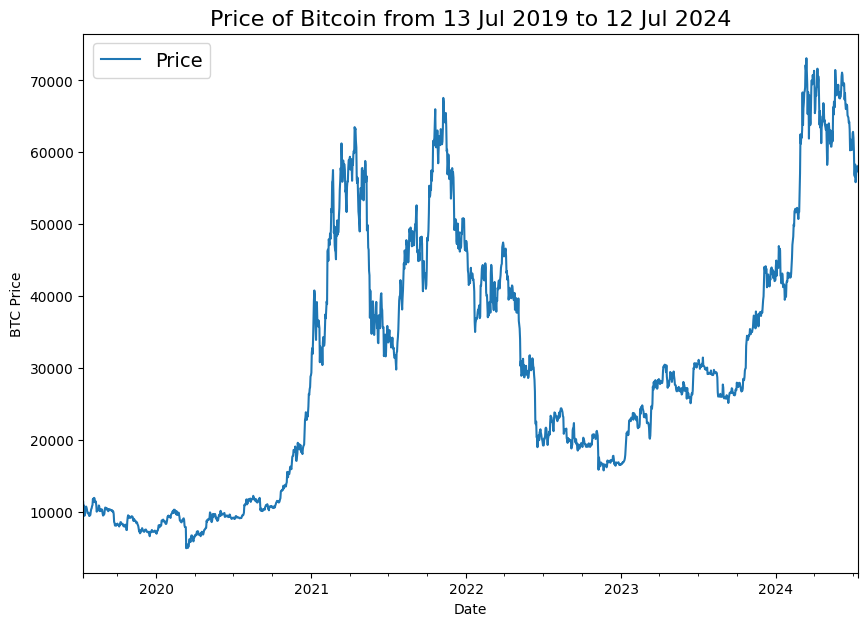

In [9]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 13 Jul 2019 to 12 Jul 2024", fontsize=16)
plt.legend(fontsize=14);

## Creating Train and Test Sets

In [10]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2019-07-13T00:00:00.000000000', '2019-07-14T00:00:00.000000000',
        '2019-07-15T00:00:00.000000000', '2019-07-16T00:00:00.000000000',
        '2019-07-17T00:00:00.000000000', '2019-07-18T00:00:00.000000000',
        '2019-07-19T00:00:00.000000000', '2019-07-20T00:00:00.000000000',
        '2019-07-21T00:00:00.000000000', '2019-07-22T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([11392.378906, 10256.058594, 10895.089844,  9477.641602,
         9693.802734, 10666.482422, 10530.732422, 10767.139648,
        10599.105469, 10343.106445]))

In [13]:
from sklearn.model_selection import train_test_split

# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1462, 366, 1462, 366)

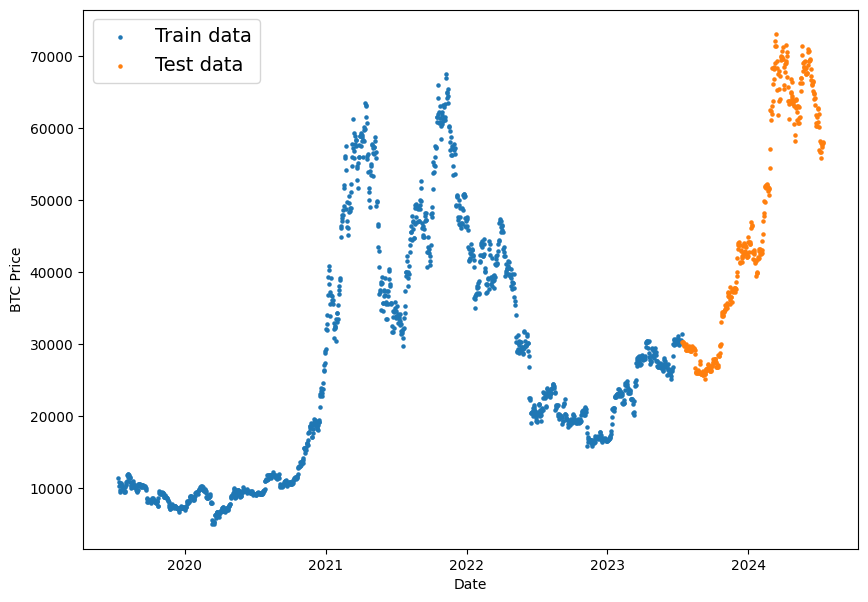

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

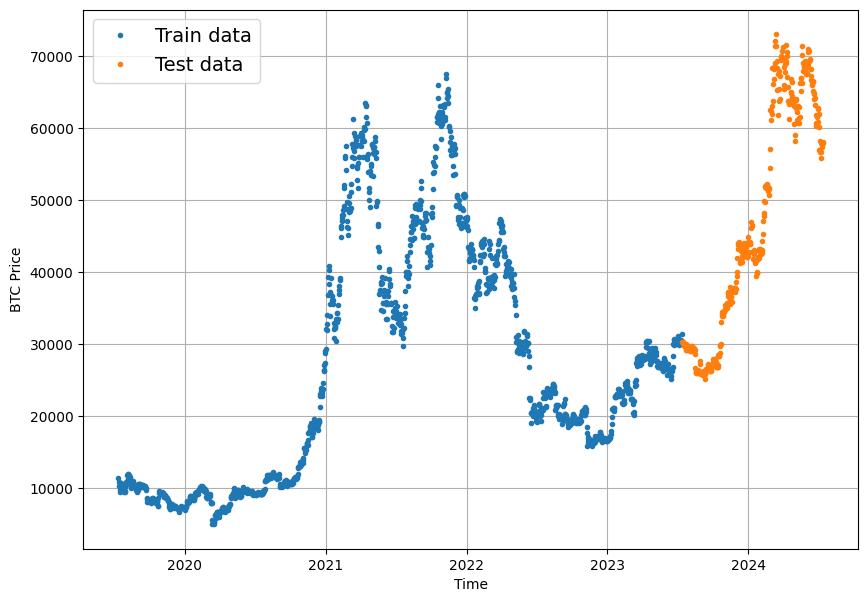

In [16]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# **Modelling**

> **horizon** = number of timesteps to predict into future

> **window** = number of timesteps from past used to predict horizon